<a href="https://colab.research.google.com/github/zainuamalik/zainuamalik/blob/main/Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import files from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from collections import Counter
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVC


In [ ]:
#reading the data and storing in variables

training_data = pd.read_csv('/content/drive/MyDrive/FML/Data/adult-train.csv', skipinitialspace= True)
testing_data = pd.read_csv('/content/drive/MyDrive/FML/Data/adult-test.csv', skipinitialspace= True)


#replacing hyphens from column names with underscores

training_data.columns = training_data.columns.str.replace("-", "_")
testing_data.columns = training_data.columns.str.replace("-", "_")

#changing label name

training_data = training_data.rename(columns= {'<=50K/>50K.' : 'income'})
testing_data = testing_data.rename(columns={'<=50K/>50K.' : 'income'})

In [ ]:
#Inspecting the dataset
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
#######################################
# DATA PREPARATION AND HANDLING MISSING DATA

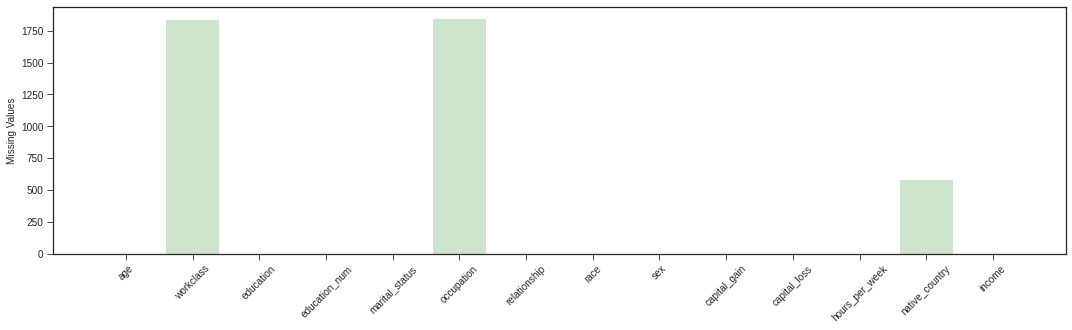

In [ ]:
#sum of values missing per column
mv = []

#Count missing values
for x in training_data.columns:
    mv.append(training_data[x].isin(["?"]).sum())

#Creating bar chart

fig, ax =  plt.subplots(figsize=(15, 4))
index   = np.arange(training_data.shape[1])
ax.bar(index, mv, alpha = 0.2, color = 'g')
ax.set_ylabel('Missing Values')
ax.set_xticks(index)
ax.set_xticklabels((training_data.columns))

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

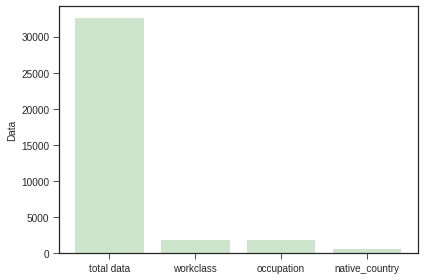

In [ ]:
#Comparing amount of missing values with size of dataset using bar chart

y_values = [training_data.shape[0], mv[1], mv[5], mv[12]]

fig, ax = plt.subplots()
index   = np.arange(4)

ax.bar(index, y_values, alpha = 0.2, color = 'g')
ax.set_ylabel('Data')
ax.set_xticks(index)
ax.set_xticklabels(('total data','workclass','occupation','native_country'))

fig.tight_layout()
plt.show()

In [ ]:
#Copying dataframe so the original remains intact

train_df= training_data.copy(deep= True)
test_df= testing_data.copy(deep= True)

In [ ]:
# Converting missing values('?') to NaN values
def replace_mv(data):
  new_data= data.replace('?', np.nan)
  print('Missing values converted to NaN')
  return new_data

# Dropping rows with missing values as this will not significantly affect the size of the dataset
def remove_na(data):
  data.dropna(how='any', inplace=True)
  data.reset_index(drop=True, inplace=True)
  print('Count of rows after removing missing values= ' + str(data.shape[0]))
  return data

In [ ]:
train_df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
test_df.income.unique()

array(['<=50K.', '>50K.'], dtype=object)

In [ ]:
# Removind periods from target label in testing data
test_df.income = test_df.income.str.replace(".", "")

In [ ]:
test_df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# Removing NaN values from dataset
print('Training dataset:')
train_df= replace_mv(train_df)
train_df= remove_na(train_df)
train_rows_rem= training_data.shape[0] - train_df.shape[0]
print(str(train_rows_rem) + ' have been removed from training dataframe')

print()

print('Testing dataset:')

test_df= replace_mv(test_df)
test_df= remove_na(test_df)
test_rows_rem= testing_data.shape[0] - test_df.shape[0]
print(str(test_rows_rem) + ' have been removed from testing dataframe')

Training dataset:
Missing values converted to NaN
Count of rows after removing missing values= 30162
2399 have been removed from training dataframe

Testing dataset:
Missing values converted to NaN
Count of rows after removing missing values= 15060
1221 have been removed from testing dataframe


2399 have been removed
Count of rows after removing missing values= 30162


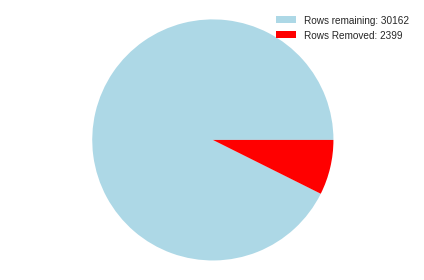

In [ ]:
#Pie chart for analysis of training dataframe

print(str(train_rows_rem) + ' have been removed')
print('Count of rows after removing missing values= ' + str(train_df.shape[0]))

patches, texts = plt.pie([train_df.shape[0], train_rows_rem], colors=['lightblue', 'red'])
plt.legend(patches, ['Rows remaining: ' + str(train_df.shape[0]), 'Rows Removed: ' + str(train_rows_rem)], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

1221 have been removed
Count of rows after removing missing values= 15060


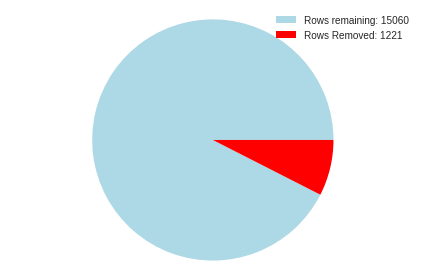

In [ ]:
#Pie chart for analysis of testing dataframe

print(str(test_rows_rem) + ' have been removed')
print('Count of rows after removing missing values= ' + str(test_df.shape[0]))

patches, texts = plt.pie([test_df.shape[0], test_rows_rem], colors=['lightblue', 'red'])
plt.legend(patches, ['Rows remaining: ' + str(test_df.shape[0]), 'Rows Removed: ' + str(test_rows_rem)], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#Workclass feature count

train_df.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [ ]:
# Combining similar features

def combine_workclass(data):
  data.workclass = data.workclass = data.workclass.replace({
                                        'Self-emp-not-inc': 'Self-emp',
                                        'Self-emp-inc': 'Self-emp',
                                        'Local-gov': 'Gov',
                                        'Federal-gov': 'Gov',
                                        'State-gov': 'Gov'    })

combine_workclass(train_df)
combine_workclass(test_df)

In [ ]:
#Education feature count

train_df.education.value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [ ]:
# Combining similar features
def combine_edu(data):
  data.education = data.education.replace({
                                        'Preschool': 'Dropout',
                                        '1st-4th': 'Dropout',
                                        '5th-6th': 'Dropout',
                                        '7th-8th': 'Dropout',
                                        '9th': 'Dropout',
                                        '10th': 'Dropout',
                                        '11th': 'Dropout',
                                        '12th': 'Dropout',
                                        'Some-college': 'College',
                                        'Assoc-voc': 'College',
                                        'Assoc-acdm': 'College' })
combine_edu(train_df)
combine_edu(test_df)

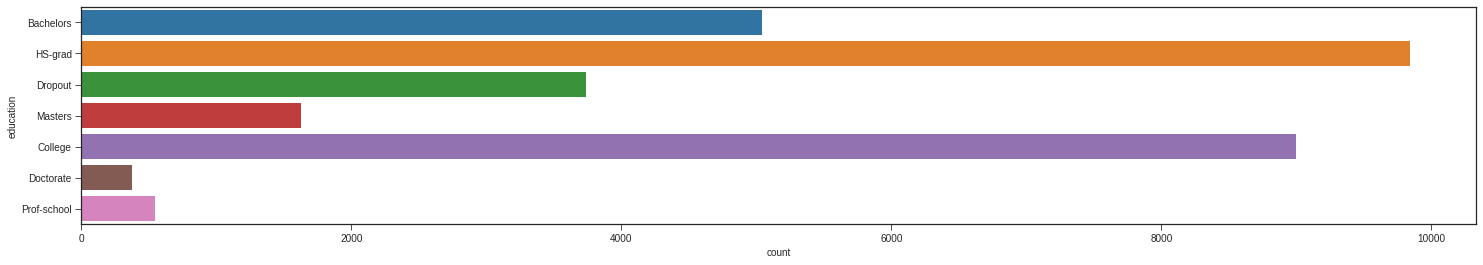

In [ ]:
#Checking result and inspecting features for training dataframe

fig = plt.figure(figsize=(25,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=train_df)

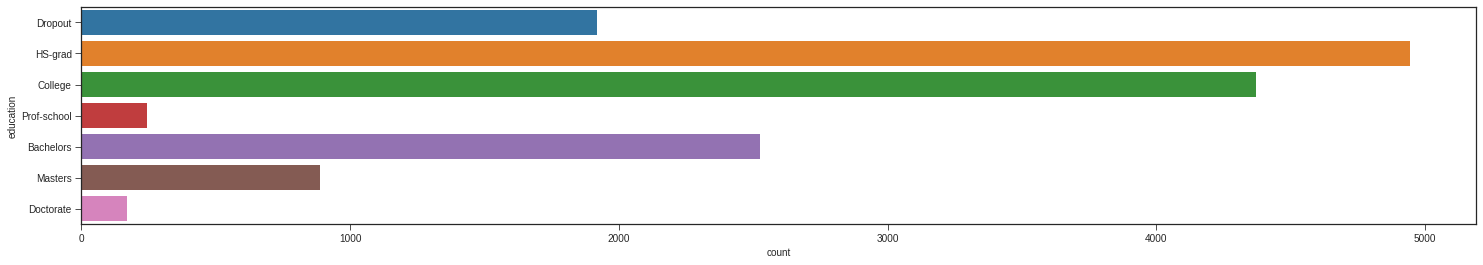

In [ ]:
#Checking result and inspecting features for testing dataframe

fig = plt.figure(figsize=(25,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=test_df)

In [ ]:
#Marital status feature count

train_df.marital_status.value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [ ]:
# Combining similar features

def combine_mar(data):
  data['marital_status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
  data['marital_status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
  data['marital_status'].replace('Never-married', 'Unmarried', inplace=True)
  data['marital_status'].replace(['Married-spouse-absent'], 'Unmarried', inplace=True)
  data['marital_status'].replace(['Divorced'], 'Separated', inplace=True)
  data['marital_status'].replace(['Separated'], 'Separated', inplace=True)

combine_mar(train_df)
combine_mar(test_df)

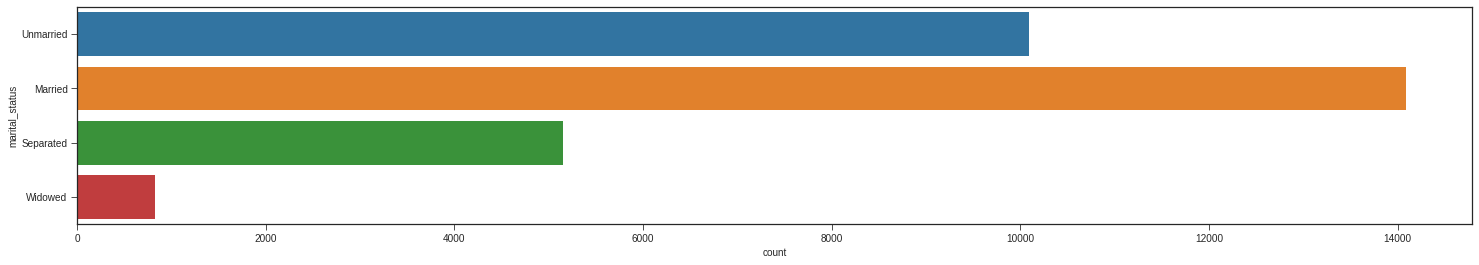

In [ ]:
#Checking result and inspecting features for training dataframe

fig = plt.figure(figsize=(25,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=train_df)

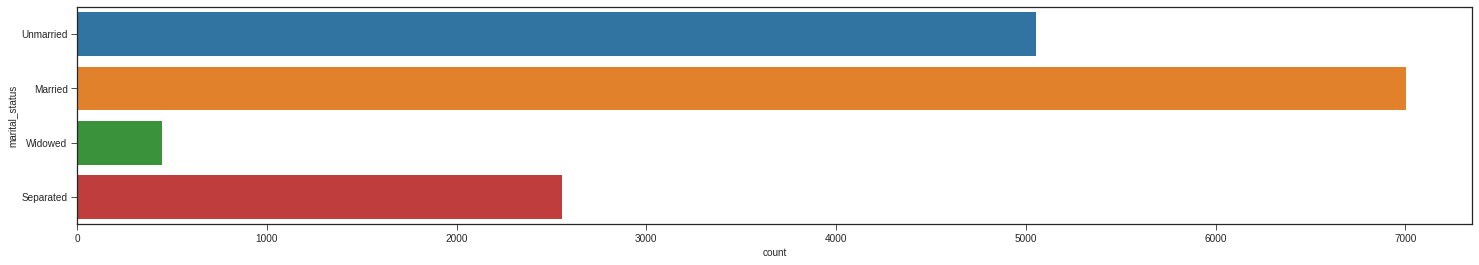

In [ ]:
#Checking result and inspecting features for testing dataframe

fig = plt.figure(figsize=(25,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=test_df)

In [ ]:
# Checking to see if there are any extra values in the training native_country column

train_val= list(train_df.native_country.unique())
test_val= list(test_df.native_country.unique())

difference= list(set(train_val) - set(test_val))

print(difference)

['Holand-Netherlands']


In [ ]:
# Remove extra value from native_country column in training data

i = train_df[((train_df.native_country == 'Holand-Netherlands'))].index
train_df.native_country.drop(labels=18175, inplace=True, axis=0)

In [ ]:
# Removing Holand column since it will not affect the dataframe

train_df = train_df.loc[train_df["native_country"] != 'Holand-Netherlands']

In [ ]:
test_df.native_country.unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [ ]:
#####################################
# ENCODING DATA

In [ ]:
def encode_data(df):

  le     = LabelEncoder()
  mms    = MinMaxScaler()
  ohe    = OneHotEncoder(sparse=False)

  # Label encoding features

  work = np.reshape(le.fit_transform(df['workclass']), (df.shape[0], 1))
  edu = np.reshape(le.fit_transform(df['education']), (df.shape[0], 1))
  mar = np.reshape(le.fit_transform(df['marital_status']), (df.shape[0], 1))
  occ = np.reshape(le.fit_transform(df['occupation']), (df.shape[0], 1))
  rel = np.reshape(le.fit_transform(df['relationship']), (df.shape[0], 1))
  r = np.reshape(le.fit_transform(df['race']), (df.shape[0], 1))
  s = np.reshape(le.fit_transform(df['sex']), (df.shape[0], 1))
  nat = np.reshape(le.fit_transform(df['native_country']), (df.shape[0], 1))

  # Joining label encoded feature arrays

  cat_features= np.concatenate([work, edu, mar, occ, rel, r, s, nat], axis=1)

  #Label encoding target variable

  le_target   = np.reshape(le.fit_transform(df['income']), (df.shape[0], 1))

  # Scaling numerical features

  scaled_features= mms.fit_transform(df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

  # One-Hot-Encoding categorical features

  ohe_features = ohe.fit_transform(cat_features)

  # Joining one-hot-encoded feature arrays

  encoded_data = np.concatenate([scaled_features, ohe_features, le_target], axis=1)

  # Converting arrays to dataframe type

  enc_df = pd.DataFrame(encoded_data)

  return enc_df


In [ ]:
train_enc_df= encode_data(train_df)

test_enc_df= encode_data(test_df)

In [ ]:
###################################
# BASELINE MODEL (Dummy Classifier)

In [ ]:
# Evaluation function

def evaluate_model(X, y, model):

	#evaluation procedure

	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

#Splitting data into inputs and outputs

dum_X= train_df.drop(columns='income')

dum_y= train_df['income']

#Define dummy classifier model

model = DummyClassifier(strategy='most_frequent')

#Evaluate the model
model_score = evaluate_model(dum_X, dum_y, model)

#Model performance

print(dum_X.shape, dum_y.shape)
print('Mean Accuracy: %.3f Standard deviation: %.3f' % (mean(model_score), std(model_score)))

(30161, 13) (30161,)
Mean Accuracy: 0.751 Standard deviation: 0.000


In [ ]:
####################################
# Inspecting Features

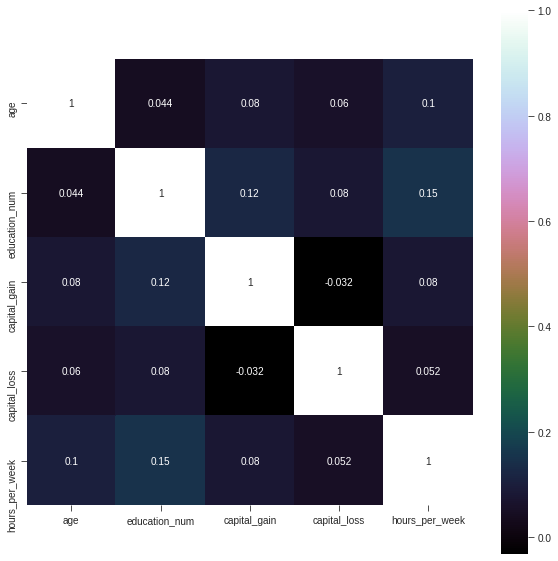

In [ ]:
# Correlation heatmap

correlation = train_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

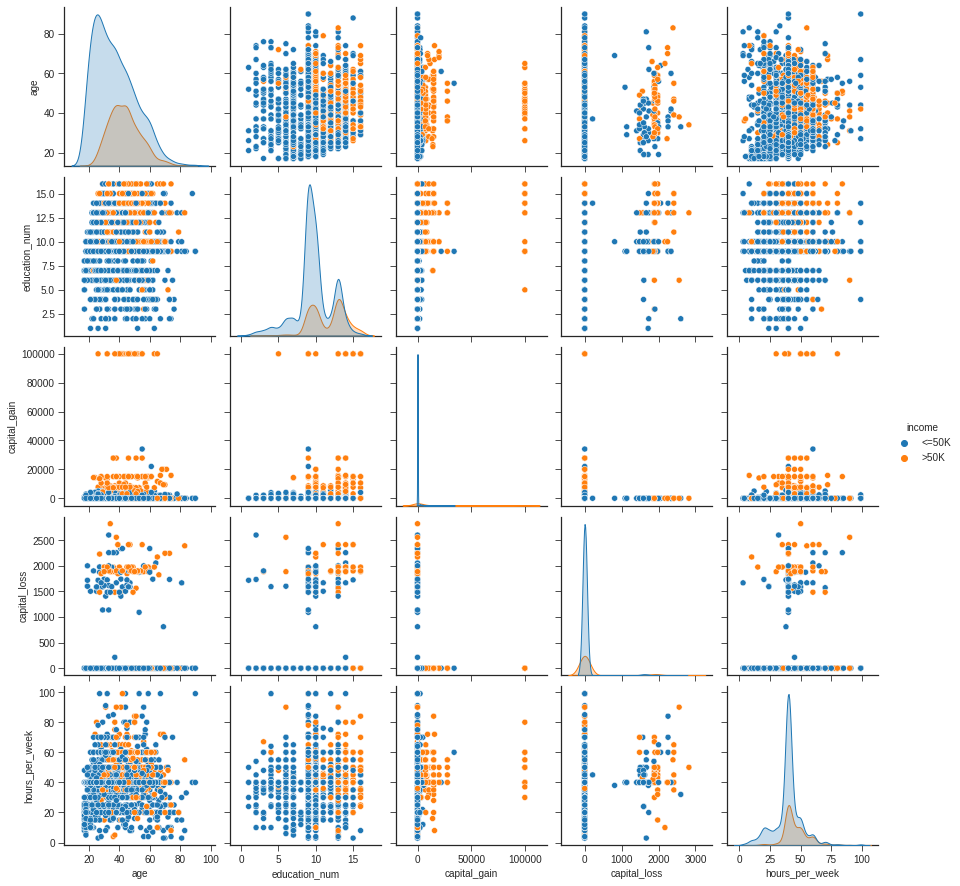

In [ ]:
#Sample of dataframe
df_sample = train_df.sample(frac=0.10)

# Pairwise plots
pplot = sns.pairplot(df_sample, hue='income')

In [ ]:
##################################
# EVALUATION OF DIFFERENT MODELS

In [ ]:
##Splitting target label and features

X_train = train_enc_df.values[:, :-1]
y_train = train_enc_df.values[:, -1]

X_test= test_enc_df.values[:, :-1]
y_test= test_enc_df.values[:, -1]

In [ ]:
#Initializing different models

models = []
models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('LSVM', SVC(kernel='linear')))
models.append(('RSVM', SVC(kernel='rbf')))
models.append(('SSVM', SVC(kernel='sigmoid')))
models.append(('PSVM', SVC(kernel='poly')))

# Scores for each model
scores = []
names = []

print('Mean accuracy on test data:')

#Train and test each model
for name, model in models:
  model.fit(X_train, y_train)
  names.append(name)
  scores.append(model.score(X_test, y_test))
  print(name, model.score(X_test, y_test))

In [ ]:
score_df= pd.DataFrame(scores, index= names, columns=['Accuracy'])
display(score_df)

,Accuracy
LR,0.845219
LSVM,0.845817
RSVM,0.834529
SSVM,0.752789
PSVM,0.836853


In [ ]:
##############################
# FINAL MODEL

In [ ]:
# Train LSVC on training data since it had the highest accuracy

svc = SVC(kernel='linear')

svc_model= svc.fit(X_train, y_train)

# Evaluating the model on testing data

score_svc = svc_model.score(X_test, y_test)

print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8458167330677291


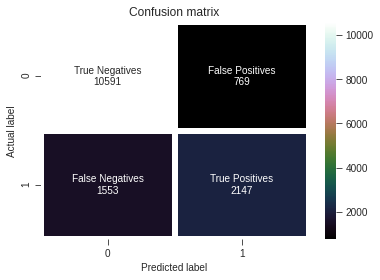

In [ ]:
# Get LSVC predictions for testing data

y_pred = svc_model.predict(X_test)

# Confusion matrix for LSVC predictions

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives','False Positives','False Negatives','True Positives']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

#Display confuxion matrix

sns.heatmap(cf_matrix, annot= labels, linewidths= 5, cmap='cubehelix', fmt='',  )
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
# Computing evaluation metrics for classifier

model_metrics= ['Accuracy',
                'Precision',
                'Recall',
                'F1 Score']

metrics_scores= [metrics.accuracy_score(y_test, y_pred),
                metrics.precision_score(y_test, y_pred),
                metrics.recall_score(y_test, y_pred),
                metrics.f1_score(y_test, y_pred)]


In [ ]:
metrics_df= pd.DataFrame(metrics_scores, index= model_metrics, columns= ['LSVC Metrics'])

In [ ]:
metrics_df

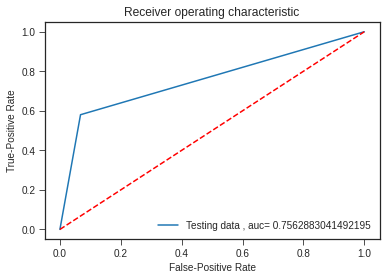

In [ ]:
#Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Testing data , auc= " + str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False-Positive Rate')
plt.ylabel('True-Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [ ]:
# Function to evaluate function on specified amount of data

def multi_test(train_data, data_amount):
  X_train = train_data.values[:data_amount, :-1]
  y_train= train_data.values[:data_amount, -1]
  svc_model= svc.fit(X_train, y_train)
  score= svc_model.score(X_test, y_test)
  return score

# Get accuracy score of model on dataset sizes provided

data_amounts= [10000, 15000, 20000, 25000]
accuracies= []

for amount in data_amounts:
  score= multi_test(train_enc_df, amount)
  accuracies.append(score)
  print('Training dataset size: ' + str(amount) + ' Accuracy on data: ' + str(score))

Training dataset size: 10000 Accuracy on data: 0.8410358565737052
Training dataset size: 15000 Accuracy on data: 0.8431606905710491
Training dataset size: 20000 Accuracy on data: 0.8450199203187251
Training dataset size: 25000 Accuracy on data: 0.8451527224435591


,Accuracy
Dataset Size,
10000,0.841036
15000,0.843161
20000,0.845020
25000,0.845153


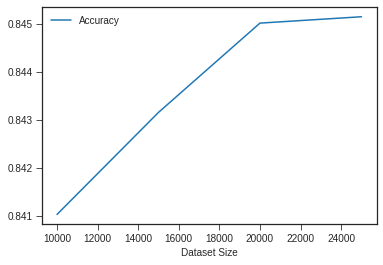

In [ ]:
#Dataframe with changing accuracies according to dataset size

acc_df= pd.DataFrame(accuracies, index= data_amounts, columns= ['Accuracy'])
acc_df.index.names = ['Dataset Size']
display(acc_df)

# Graph to show how dataset size affects accuracy
acc_df.plot.line()

In [ ]:
# Inspecting how model performance is affected by change in hyper-parameter C

def tune_test(train_data, c_param):
  svc = SVC(kernel='linear', C= c_param)
  X_train = train_data.values[:, :-1]
  y_train= train_data.values[:, -1]
  svc_model= svc.fit(X_train, y_train)
  score= svc_model.score(X_test, y_test)
  return score

c_values= [0.1, 0.5, 1]
tune_scores= []

for c in c_values:
  tune_score= tune_test(train_enc_df, c)
  tune_scores.append(tune_score)
  print('C value: ' + str(c), 'Accuracy: ' + str(tune_score))

C value: 0.1 Accuracy: 0.8397742363877823
C value: 0.5 Accuracy: 0.8456839309428951
C value: 1 Accuracy: 0.8458167330677291


,Accuracy
C Parameter Value,
0.1,0.839774
0.5,0.845684
1.0,0.845817


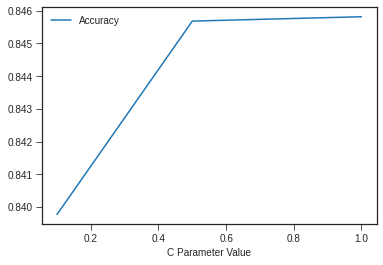

In [ ]:
tune_df= pd.DataFrame(tune_scores, index= c_values, columns= ['Accuracy'])
tune_df.index.names = ['C Parameter Value']
display(tune_df)

# Graph to show how dataset size affects accuracy
tune_df.plot.line()

In [ ]:
###############################################